In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

## Load dataset

In [2]:
final_df = pd.read_csv('final_reg.csv', index_col=0)
final_df.head()

,Latitude,Longitude,Depth,Magnitude,Root Mean Square
0,0.590649,0.904493,0.189274,6.0,0.317635
1,0.484060,0.853759,0.115675,5.8,0.317635
2,0.346451,0.016736,0.030096,6.2,0.317635
3,0.110396,0.434562,0.022964,5.8,0.317635
4,0.545838,0.851190,0.022964,5.8,0.317635


## Split the attribute & target

In [3]:
attribute_columns = ['Latitude', 'Longitude', 'Root Mean Square']
target_columns = ['Depth', 'Magnitude', 'Root Mean Square']

X = final_df.drop(target_columns, 1)
y = final_df.drop(attribute_columns, 1)

In [4]:
X.head()

,Latitude,Longitude
0,0.590649,0.904493
1,0.484060,0.853759
2,0.346451,0.016736
3,0.110396,0.434562
4,0.545838,0.851190


In [5]:
y.head()

,Depth,Magnitude
0,0.189274,6.0
1,0.115675,5.8
2,0.030096,6.2
3,0.022964,5.8
4,0.022964,5.8


## Split dataset into train & test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Linear Regression model

In [7]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Predict test set target

In [8]:
predicted_y = linear_model.predict(X_test)
predicted_y

array([[0.10886108, 5.88102229],
       [0.11290932, 5.87624231],
       [0.13825959, 5.85017373],
       ...,
       [0.07373528, 5.91379077],
       [0.09716154, 5.88806667],
       [0.09546902, 5.88993691]])

In [9]:
score = r2_score(predicted_y, y_test)
print("Test MSE: {}%".format(score * 100))

score = linear_model.score(X_test, y_test)
print("Test Score: {}%".format(score * 100))

predicted_y = linear_model.predict(X_train)
score = r2_score(predicted_y, y_train)
print("Train MSE: {}%".format(score * 100))

score = linear_model.score(X_train, y_train)
print("Test Score: {}%".format(score * 100))

Test MSE: -32217.197153156667%
Test Score: 0.4957963241977952%
Train MSE: -33054.667382408836%
Test Score: 0.3055720792025428%


## Train Random Forest Regression model

In [10]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
X_train.head()

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Latitude,Longitude
16246,0.379784,0.017361
19733,0.492700,0.211597
2122,0.385161,0.296129
22462,0.483749,0.851276
17363,0.144918,0.570322


In [11]:
predicted_y = rf_model.predict(X_test)
score = r2_score(predicted_y, y_test)
print("r2 score: {}%".format(score * 100))

score = rf_model.score(X_test, y_test)
print("Test score: {}%".format(score * 100))

score = rf_model.score(X_train, y_train)
print("Train score: {}%".format(score * 100))

r2 score: -94.19556295130566%
Test score: -9.399444613484938%
Train score: 81.88603350604419%


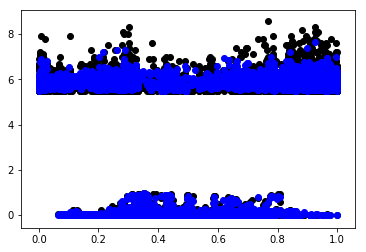

In [13]:
plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, predicted_y, color='blue')
plt.show()